In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.api import OLS, add_constant
import ISLP.models
from sklearn.model_selection import train_test_split

In [2]:
data_boston = ISLP.load_data("Boston")

# 多项式回归

## 概述

在此笔记本中，您将深入了解多元线性回归的基本原理和实践，使用Python完成以下内容：

- 进行探索性数据分析（EDA），以发现数据中的模式和洞察。
- 可视化目标变量 (`medv`) 与预测变量 (`lstat`) 之间的关系。
- 实现多项式回归模型，以评估高次多项式变量是否提供更好的拟合效果。
- 通过可视化和统计指标对比线性回归和多项式回归模型。
- 使用方差分析（ANOVA）对不同模型进行比较，以确定最佳拟合模型。

我们想要探讨对变量 `lstat` 进行二次多项式拟合是否更加合理。我们将构建一个包含目标变量及其平方的矩阵。由于我们旨在对更高次多项式进行深入研究，因此将定义一个函数，用于对数据进行多项式模型拟合：

In [3]:
def fit_polynomial_model(predictor, response, degree):
    """
    Fit a polynomial regression model to the given predictor and response data.

    This function generates polynomial features of the specified degree
    from the predictor data, fits an Ordinary Least Squares (OLS)
    regression model, and returns the fitted model.

    Parameters
    ----------
    predictor : array-like
        The independent variable(s) for the model, typically a 1D array
        or list of predictor values.

    response : array-like
        The dependent variable for the model, typically a 1D array or
        list of response values.

    degree : int
        The degree of the polynomial to fit. Must be a non-negative integer.

    Returns
    -------
    model : OLS
        The fitted OLS regression model.

    Examples
    --------
    >>> import numpy as np
    >>> from statsmodels.api import OLS
    >>> predictor = np.array([1, 2, 3, 4])
    >>> response = np.array([2.2, 3.8, 5.6, 8.1])
    >>> model = fit_polynomial_model(predictor, response, degree=2)
    >>> print(model.summary())

    >>> predictor = np.array([0, 1, 2, 3])
    >>> response = np.array([1, 2, 3, 5])
    >>> model = fit_polynomial_model(predictor, response, degree=1)
    >>> print(model.params)
    """
    X_poly = np.column_stack([predictor**i for i in range(degree + 1)])
    model = OLS(response, X_poly).fit()
    return model


def predict(model, predictor, degree):
    """
    Generate predictions from a fitted polynomial regression model.

    This function takes a fitted OLS model and a set of predictor values,
    creates the corresponding polynomial features based on the specified
    degree, and returns the model's predictions.

    Parameters
    ----------
    model : OLS
        The fitted OLS regression model from which to generate predictions.

    predictor : array-like
        The independent variable(s) for which predictions are to be made,
        typically a 1D array or list of predictor values.

    degree : int
        The degree of the polynomial features to generate. Must be a
        non-negative integer.

    Returns
    -------
    predictions : array
        The predicted values generated by the model based on the input
        predictor values.

    Examples
    --------
    >>> import numpy as np
    >>> from statsmodels.api import OLS
    >>> predictor = np.array([1, 2, 3, 4])
    >>> response = np.array([2.2, 3.8, 5.6, 8.1])
    >>> model = fit_polynomial_model(predictor, response, degree=2)
    >>> new_predictor = np.array([1.5, 2.5, 3.5])
    >>> predictions = predict(model, new_predictor, degree=2)
    >>> print(predictions)

    >>> new_predictor = np.array([0, 1, 2, 3])
    >>> predictions = predict(model, new_predictor, degree=2)
    >>> print(predictions)
    """
    X_poly = np.column_stack([predictor**i for i in range(degree + 1)])
    return model.predict(X_poly)

我们将使用自定义函数来拟合不同阶数的多项式模型。

接下来，让我们绘制这些结果，比较线性回归（一阶多项式）与不同阶数多项式的拟合效果，并讨论结果。

首先，我们绘制原始数据的散点图。接着，绘制线性回归结果，最后绘制多项式拟合结果。

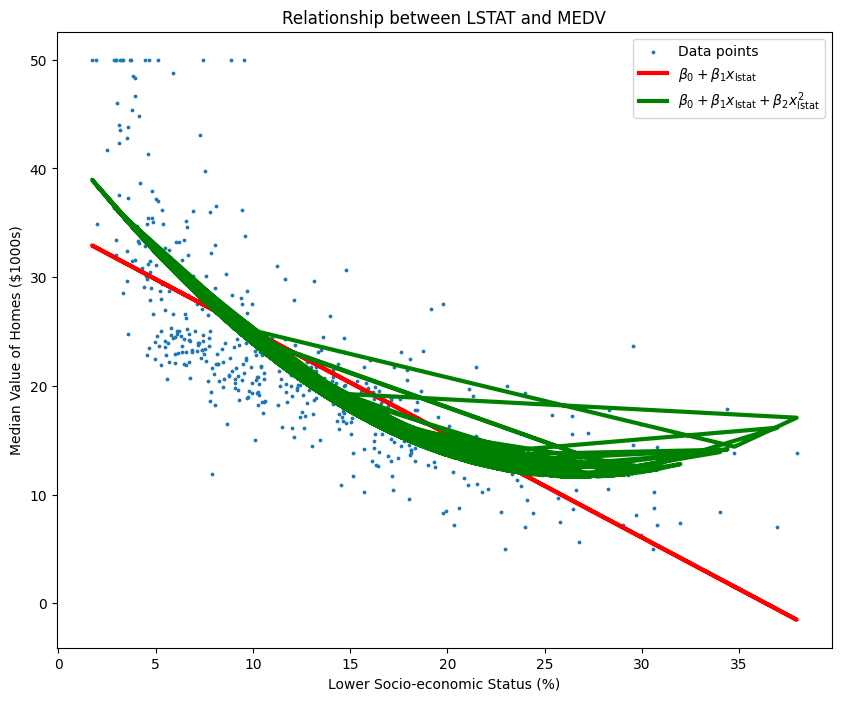

In [4]:
lstat = data_boston["lstat"]
medv = data_boston["medv"]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

ax.scatter(
    lstat,
    medv,
    s=3,
    label="Data points",
)
ax.set_xlabel("Lower Socio-economic Status (%)")
ax.set_ylabel("Median Value of Homes ($1000s)")
ax.set_title("Relationship between LSTAT and MEDV")


lstat = data_boston["lstat"]
medv = data_boston["medv"]

degree = 1
model = fit_polynomial_model(lstat, medv, degree)
y_pred = predict(model, lstat, degree)

ax.plot(
    lstat,
    y_pred,
    "r",
    lw=3,
    label=r"$\beta_0 + \beta_1x_\text{lstat}$",
)

degree = 2
model = fit_polynomial_model(lstat, medv, degree)
y_pred = predict(model, lstat, degree)
ax.plot(
    lstat,
    y_pred,
    "g",
    lw=3,
    label=r"$\beta_0 + \beta_1x_\text{lstat} + \beta_2x_\text{lstat}^2$",
)

ax.legend()
plt.show()

### 为什么图形看起来有些奇怪？

这是因为 `matplotlib` 按照输入数据的顺序连接点，因此图形可能显得不连贯。为了让图形显示正确，我们需要先将数据按 `lstat` 值进行排序：

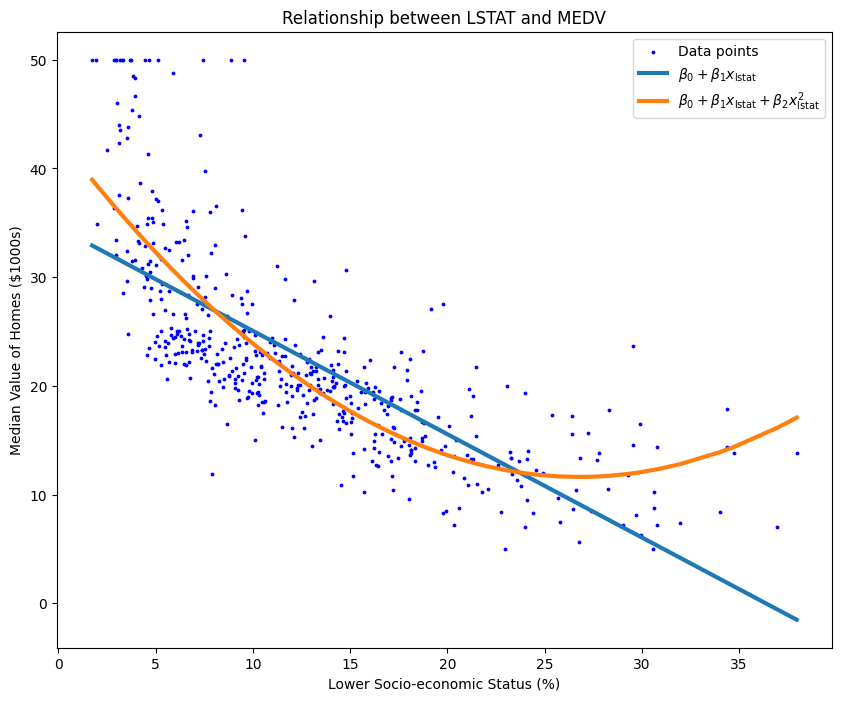

In [5]:
data_boston = data_boston.sort_values(by="lstat")
lstat = data_boston["lstat"]
medv = data_boston["medv"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

ax.scatter(
    lstat,
    medv,
    s=3,
    c="b",
    label="Data points",
)
ax.set_xlabel("Lower Socio-economic Status (%)")
ax.set_ylabel("Median Value of Homes ($1000s)")
ax.set_title("Relationship between LSTAT and MEDV")


lstat = data_boston["lstat"]
medv = data_boston["medv"]

degree = 1
model = fit_polynomial_model(lstat, medv, degree)
y_pred = predict(model, lstat, degree)

ax.plot(
    lstat,
    y_pred,
    lw=3,
    label=r"$\beta_0 + \beta_1x_\text{lstat}$",
)

degree = 2
model = fit_polynomial_model(lstat, medv, degree)
y_pred = predict(model, lstat, degree)
ax.plot(
    lstat,
    y_pred,
    lw=3,
    label=r"$\beta_0 + \beta_1x_\text{lstat} + \beta_2x_\text{lstat}^2$",
)

ax.legend()
plt.show()

## 偏差与方差

In [6]:
def get_bias_and_variance(predicted_values, observed_values):
    """
    Calculate the bias and variance of a model's predictions.

    This function computes the bias and variance based on the predicted values
    from a model and the observed (true) values. Bias measures the average
    difference between the observed and predicted values, while variance
    measures the spread of the predicted values around their mean.

    Parameters
    ----------
    predicted_values : array-like
        The predicted values from the model. Should be a one-dimensional
        array-like structure (e.g., list, NumPy array, or pandas Series).
    observed_values : array-like
        The actual observed values (ground truth). Should be a one-dimensional
        array-like structure of the same length as `predicted_values`.

    Returns
    -------
    bias : float
        The average difference between the observed values and predicted values.
        A higher absolute bias indicates that the model's predictions systematically
        deviate from the true values.
    variance : float
        The variance of the predicted values, indicating the model's sensitivity
        to variations in the input data. A higher variance means the predictions
        are more spread out from their mean.

    Examples
    --------
    >>> import numpy as np
    >>> predicted = np.array([2.5, 0.0, 2.1, 1.6])
    >>> observed = np.array([3.0, -0.5, 2.0, 1.0])
    >>> bias, variance = get_bias_and_variance(predicted, observed)
    >>> print(f"Bias: {bias}, Variance: {variance}")

    Notes
    -----
    - Bias is calculated as the mean difference between observed and predicted values:
      `bias = mean(observed_values - predicted_values)`.
    - Variance is calculated as the variance of the predicted values:
      `variance = var(predicted_values)`.

    Raises
    ------
    ValueError
        If the lengths of `predicted_values` and `observed_values` do not match.
    """
    bias = np.mean(observed_values - predicted_values)
    variance = np.var(predicted_values)
    return bias, variance

/tmp/ipykernel_170000/4022896580.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat(


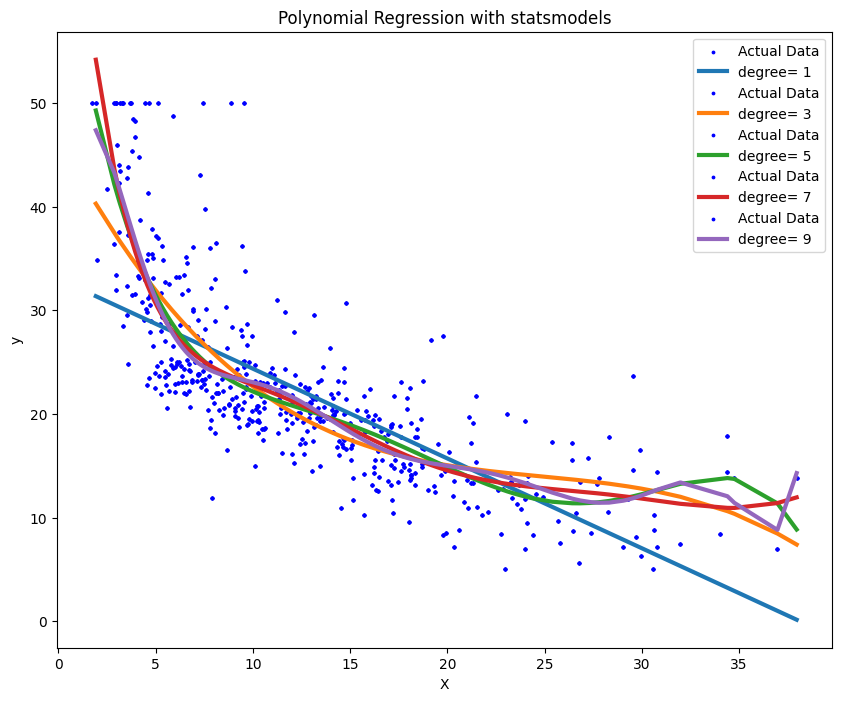

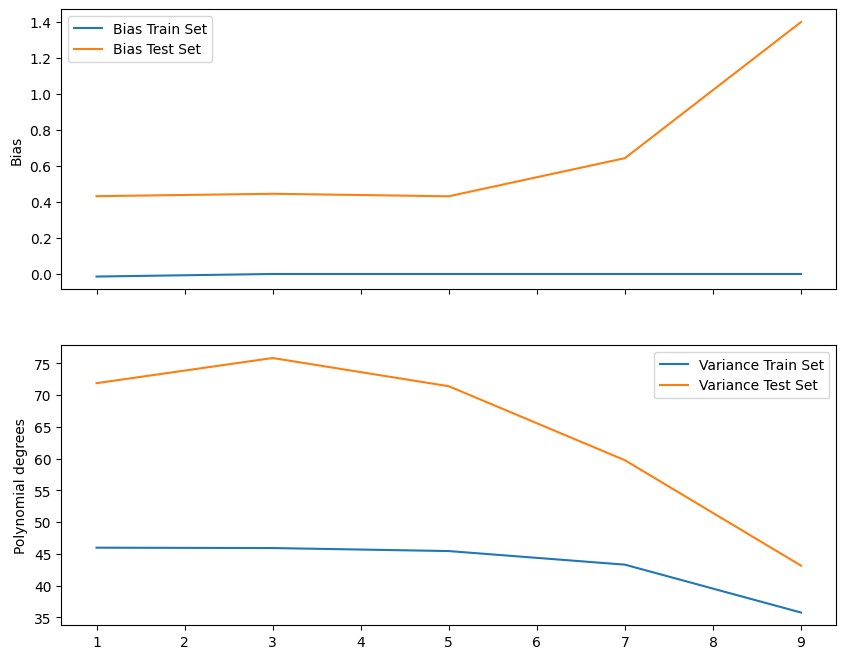

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

X_train, X_test, y_train, y_test = train_test_split(
    lstat, medv, test_size=0.33, random_state=42
)

results_df = pd.DataFrame(
    columns=["Bias Train", "Variance Train", "Bias Test", "Variance Test"]
)

max_degree = 9
degrees = np.arange(1, max_degree + 1, 2)
for degree in degrees:
    model = fit_polynomial_model(X_train, y_train, degree)

    y_train_pred = predict(model, X_train, degree)
    bias_train, var_train = get_bias_and_variance(y_train_pred, y_train)

    data = pd.DataFrame({"x": X_train, "y": y_train_pred})
    data = data.sort_values(by="x")

    y_test_pred = predict(model, X_test, degree)
    bias_test, var_test = get_bias_and_variance(y_test_pred, y_test)

    results_df = pd.concat(
        [
            pd.DataFrame(
                [[bias_train, var_train, bias_test, var_test]],
                columns=results_df.columns,
            ),
            results_df,
        ],
        ignore_index=True,
    )

    ax.scatter(lstat, medv, s=3, c="b", label="Actual Data")
    ax.plot(data["x"], data["y"], lw=3, label=f"degree= {degree}")


ax.set_title("Polynomial Regression with statsmodels")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.legend()
plt.show()


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
for set_name in ["Train", "Test"]:
    ax[0].plot(degrees, results_df[f"Bias {set_name}"], label=f"Bias {set_name} Set")
    ax[1].plot(
        degrees, results_df[f"Variance {set_name}"], label=f"Variance {set_name} Set"
    )

ax[0].set_ylabel("Bias")
ax[1].set_ylabel("Variance")
ax[1].set_ylabel("Polynomial degrees")
ax[0].legend()
ax[1].legend()

plt.show()

## 轮到您了！

尝试在数据上绘制更高阶的多项式拟合，并使用拟合模型的结果（`ISLP.models.summarize()`）和方差分析（ANOVA）来找到最佳描述数据的模型。您的选择标准是什么？